In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import newton
from datetime import datetime

In [2]:
from pme_calc import sp500_data, index_weighted_cashflows, ln_pme, ks_pme, pme_plus, direct_alpha
from data_gen import simulate_private_equity_cashflows
sp500_final = sp500_data()
cashflows = simulate_private_equity_cashflows()
df = index_weighted_cashflows(cashflows, sp500_final)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
pme_funds = []
for fund_id in df['FundID'].unique():
    fund_df = df[df['FundID'] == fund_id].reset_index(drop=True)
    pme_funds.append({
        'FundID': fund_id,
        'LN_PME': ln_pme(fund_df),
        'KS_PME': ks_pme(fund_df),
        'PME_plus': pme_plus(fund_df),
        'Direct_Alpha': direct_alpha(fund_df)
    })

In [5]:
pme_funds[100]

{'FundID': 100,
 'LN_PME': 0.09365550786057664,
 'KS_PME': 0.526781856607782,
 'PME_plus': 0.10359900538880805,
 'Direct_Alpha': -0.06308381844056647}

In [16]:
ln_pme_list = []
for i in range(2000):
    ln_pme_list.append(pme_funds[i]['LN_PME'])

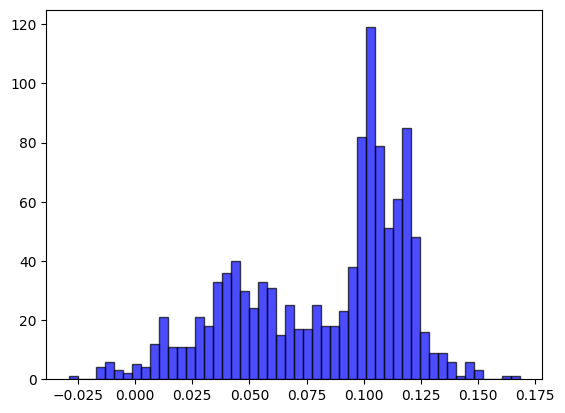

In [17]:
plt.hist(ln_pme_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

KS-PME ratio: 0.2145
LN-PME IRR: 154.4661%
PME+ ratio: 0.8672
Direct Alpha: 151.9867%


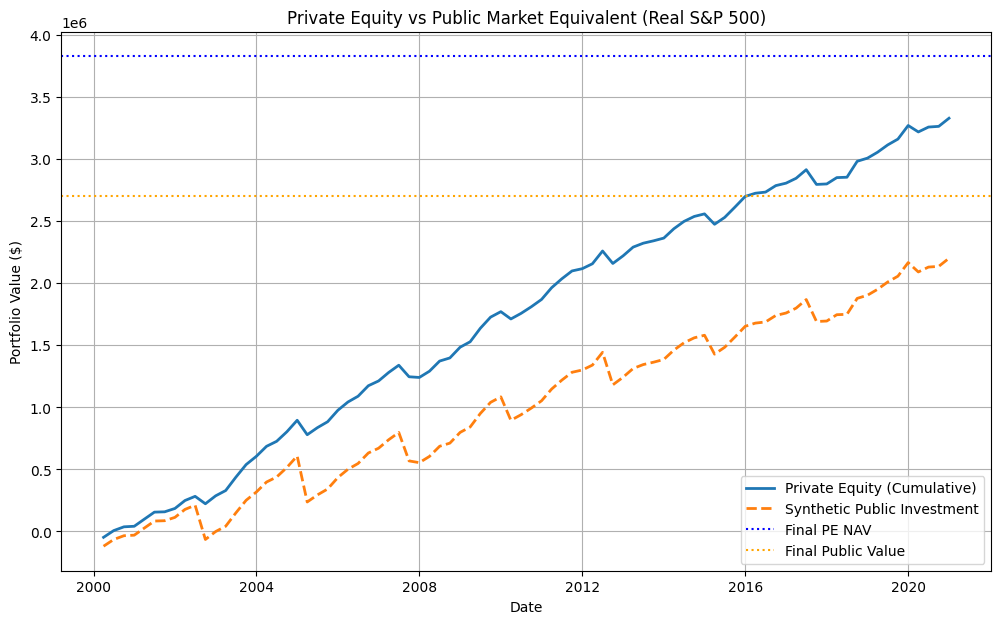

In [ ]:

# Build Cumulative PE and Public Portfolio
df['pe_value'] = -df['cashflow'].cumsum()
df['public_value'] = -np.array(public_cf[:-1]).cumsum()

df_pe_final = df['pe_value'].iloc[-1] + final_nav
df_public_final = df['public_value'].iloc[-1] + final_nav

plt.figure(figsize=(12, 7))
plt.plot(df['date'], df['pe_value'], label='Private Equity (Cumulative)', linewidth=2)
plt.plot(df['date'], df['public_value'], label='Synthetic Public Investment', linewidth=2, linestyle='--')
plt.axhline(df_pe_final, color='blue', linestyle=':', label='Final PE NAV')
plt.axhline(df_public_final, color='orange', linestyle=':', label='Final Public Value')

plt.title('Private Equity vs Public Market Equivalent (Real S&P 500)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()